In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.ensemble import bagging, RandomForestClassifier

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
from sklearn.naive_bayes import GaussianNB

In [9]:
from xgboost import XGBClassifier

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_auc_score, \
f1_score

In [11]:
pd.set_option('max_rows',100)

In [12]:
pd.set_option('max_columns',100)

In [13]:
from sklearn.feature_selection import RFE, RFECV

In [14]:
from sklearn.preprocessing import StandardScaler

### 1. Data Ingestion:

In [15]:
df_news = pd.read_csv('OnlineNewsPopularity.csv')

In [16]:
df_news.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   
4                   0.540890        19.0             19.0       20.0   

    num_videos   average_token_length   num_keywords  \
0          0.0               4.680365            5.0   
1          0.0               4.913725            4.0   
2          0.0               4.393365            6.0   
3          0.0               4.404896            7.0   
4          0.0               4.682836            7.0   

    data_channel_is_lifestyle   data_channel_is_entertainment  \
0                         0.0                             1.0   
1                         0.0                             0.0   
2                         0.0                             0.0   
3                         0.0                             1.0   
4                         0.0                             0.0   

    data_channel_is_bus   data_channel_is_socmed   data_channel_is_tech  \
0                   0.0                      0.0                    0.0   
1                   1.0                      0.0                    0.0   
2                   1.0                      0.0                    0.0   
3                   0.0                      0.0                    0.0   
4                   0.0                      0.0                    1.0   

    data_channel_is_world   kw_min_min   kw_max_min   kw_avg_min   kw_min_max  \
0                     0.0          0.0          0.0          0.0          0.0   
1                     0.0          0.0          0.0          0.0          0.0   
2                     0.0          0.0          0.0          0.0          0.0   
3                     0.0          0.0          0.0          0.0          0.0   
4                     0.0          0.0          0.0          0.0          0.0   

    kw_max_max   kw_avg_max   kw_min_avg   kw_max_avg   kw_avg_avg  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

    self_reference_min_shares   self_reference_max_shares  \
0                       496.0                       496.0   
1                         0.0                         0.0   
2                       918.0                       918.0   
3                         0.0                         0.0   
4                       545.0                     16000.0   

    self_reference_avg_sharess   weekday_is_monday   weekday_is_tuesday  \
0                   496.000000                 1.0                  0.0   
1                     0.000000                 1.0                  0.0   
2                   918.000000                 1.0         

In [17]:
df_news.tail()

url   timedelta  \
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
39639             11.0              346.0          0.529052   
39640             12.0              328.0          0.696296   
39641             10.0              442.0          0.516355   
39642              6.0              682.0          0.539493   
39643             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
39639                1.0                   0.684783         9.0   
39640                1.0                   0.885057         9.0   
39641                1.0                   0.644128        24.0   
39642                1.0                   0.692661        10.0   
39643                1.0                   0.846154         1.0   

        num_self_hrefs   num_imgs   num_videos   average_token_length  \
39639              7.0        1.0          1.0               4.523121   
39640              7.0        3.0         48.0               4.405488   
39641              1.0       12.0          1.0               5.076923   
39642              1.0        1.0          0.0               4.975073   
39643              1.0        0.0          2.0               4.471338   

        num_keywords   data_channel_is_lifestyle  \
39639            8.0                         0.0   
39640            7.0                         0.0   
39641            8.0                         0.0   
39642            5.0                         0.0   
39643            4.0                         0.0   

        data_channel_is_entertainment   data_channel_is_bus  \
39639                             0.0                   0.0   
39640                             0.0                   0.0   
39641                             0.0                   0.0   
39642                             0.0                   0.0   
39643                             1.0                   0.0   

        data_channel_is_socmed   data_channel_is_tech   data_channel_is_world  \
39639                      0.0                    1.0                     0.0   
39640                      1.0                    0.0                     0.0   
39641                      0.0                    0.0                     0.0   
39642                      0.0                    0.0                     1.0   
39643                      0.0                    0.0                     0.0   

        kw_min_min   kw_max_min   kw_avg_min   kw_min_max   kw_max_max  \
39639         -1.0        671.0      173.125      26900.0     843300.0   
39640         -1.0        616.0      184.000       6500.0     843300.0   
39641         -1.0        691.0      168.250       6200.0     843300.0   
39642         -1.0          0.0       -1.000          0.0     843300.0   
39643         -1.0         97.0       23.500     205600.0     843300.0   

          kw_avg_max   kw_min_avg   kw_max_avg   kw_avg_avg  \
39639  374962.500000  2514.742857  4004.342857  3031.115764   
39640  192985.714286  1664.267857  5470.168651  3411.660830   
39641  295850.000000  1753.882353  6880.687034  4206.439195   
39642  254600.000000     0.000000  3384.316871  1777.895883   
39643  366200.000000  3035.080555  3613.512953  3296.909481   

        self_reference_min_shares   self_reference_max_shares  \
39639                     11400.0                     48000.0   
39640                      2100.0                      2100.0   
39641                      1400.0                      1400.0   
39642                       452.0                       452.0   
39643                      2100.0                      2100.0   

     

In [18]:
df_news.shape

(39644, 61)

In [19]:
df_news.dtypes

url                                object
 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       

In [20]:
df_news.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos   average_token_length  \
count     39644.000000  39644.000000  39644.000000           39644.000000   
mean          3.293638      4.544143      1.249874               4.548239   
std           3.855141      8.309434      4.107855               0.844406   
min           0.000000      0.000000      0.000000               0.000000   
25%           1.000000      1.000000      0.000000               4.478404   
50%           3.000000      1.000000      0.000000               4.664082   
75%           4.000000      4.000000      1.000000               4.854839   
max         116.000000    128.000000     91.000000               8.041534   

        num_keywords   data_channel_is_lifestyle  \
count   39644.000000                39644.000000   
mean        7.223767                    0.052946   
std         1.909130                    0.223929   
min         1.000000                    0.000000   
25%         6.000000                    0.000000   
50%         7.000000                    0.000000   
75%         9.000000                    0.000000   
max        10.000000                    1.000000   

        data_channel_is_entertainment   data_channel_is_bus  \
count                    39644.000000          39644.000000   
mean                         0.178009              0.157855   
std                          0.382525              0.364610   
min                          0.000000              0.000000   
25%                          0.000000              0.000000   
50%                          0.000000              0.000000   
75%                          0.000000              0.000000   
max                          1.000000              1.000000   

        data_channel_is_socmed   data_channel_is_tech   data_channel_is_world  \
count             39644.000000           39644.000000            39644.000000   
mean                  0.058597               0.185299                0.212567   
std                   0.234871               0.388545                0.409129   
min                   0.000000               0.000000                0.000000   
25%                   0.000000               0.000000                0.000000   
50%                   0.000000               0.000000                0.000000   
75%                   0.000000               0.000000                0.000000   
max                   1.000000               1.000000                1.000000   

         kw_min_min     kw_max_min    kw_avg_min     kw_min_max  \
count  39644.000000   39644.000000  39644.000000   39644.000000   
mean      26.106801    1153.951682    312.366967   13612.354102   
std       69.633215    3857.9908

In [21]:
df_news.isnull().sum()

url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                 

### Inference

No null values in any of the features.

### Feature Engineering

In [22]:
def day_extract(x):
    return x.split('/')[5]

In [23]:
def month_extract(x):
    return x.split('/')[4]

In [24]:
def year_extract(x):
    return x.split('/')[3]

In [25]:
def client_extract(x):
    return x.split('/')[6]

In [26]:
df_news['day'] = df_news['url'].apply(day_extract) 

In [27]:
df_news['month'] = df_news['url'].apply(month_extract) 

In [28]:
df_news['year'] = df_news['url'].apply(year_extract) 

In [29]:
#df_news['client'] = df_news['url'].apply(client_extract) 

In [30]:
df_news.drop(columns = ['url'], axis = 1, inplace = True)

In [31]:
df_news['year'] = df_news['year'].astype(int)

In [32]:
df_news['day'] = df_news['day'].astype(int)

In [33]:
df_news['month'] = df_news['month'].astype(int)

### Inference

Extracted day, month, year from the url feature 

### Target column preperation

In [34]:
df_news[' shares'].median()

1400.0

In [35]:
df_news['target'] = np.where(df_news[' shares'] > 1400, 1, 0)

### Inference

Choose median as threshold and made new feature as target

### 2. Split Data set:

In [36]:
df_news.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

In [37]:
X = df_news.drop(columns = ['target'], axis = 1)
y = df_news.loc[:,'target']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [39]:
log_reg_1 = LogisticRegression(n_jobs=-1)

In [40]:
log_reg_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_predict_logistic_1 = log_reg_1.predict(X_test)

In [42]:
accuracy_score(y_predict_logistic_1, y_test)

0.8666554565327056

In [43]:
log_reg_1.score(X_train, y_train)

0.8633153153153154

### Inference

Model is a good fit.

### 3. Build a base model:

In [44]:
log_reg_CV = LogisticRegressionCV(n_jobs=-1)

In [45]:
log_reg_CV.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [46]:
y_predict_logistic_CV = log_reg_CV.predict(X_test)

In [47]:
print('Accuracy score is -- ',accuracy_score(y_predict_logistic_CV, y_test))

Accuracy score is --  0.9971414158399193


In [48]:
print('Confusion matrix is -- \n',confusion_matrix(y_predict_logistic_CV, y_test))

Confusion matrix is -- 
 [[6059   21]
 [  13 5801]]


In [49]:
print('Recall score is -- ',recall_score(y_predict_logistic_CV, y_test))

Recall score is --  0.9977640178878568


In [50]:
print('Precision score is -- ',precision_score(y_predict_logistic_CV, y_test))

Precision score is --  0.9963929920989351


In [51]:
print('ROC-AUC score is -- ',roc_auc_score(y_predict_logistic_CV, y_test))

ROC-AUC score is --  0.9971550352597179


In [52]:
print('F1-score is -- ',f1_score(y_predict_logistic_CV, y_test))

F1-score is --  0.9970780336885529


### Inference

1. Model is overfit
2. Recall, Precision score are good

### 4. EDA -  Plots:

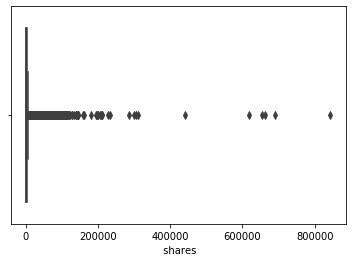

In [53]:
sns.boxplot(df_news[' shares'])
plt.show()

In [54]:
q25 = df_news[' shares'].quantile(0.25)
q75 = df_news[' shares'].quantile(0.75)
IQR = q75 - q25
UL = q75 + 1.5*IQR
LL = q25 - 1.5*IQR

In [55]:
df_news[~((df_news[' shares'] < UL) & (df_news[' shares'] > LL))].shape

(4541, 64)

In [56]:
print('Number of outliers are 4541.')

Number of outliers are 4541.


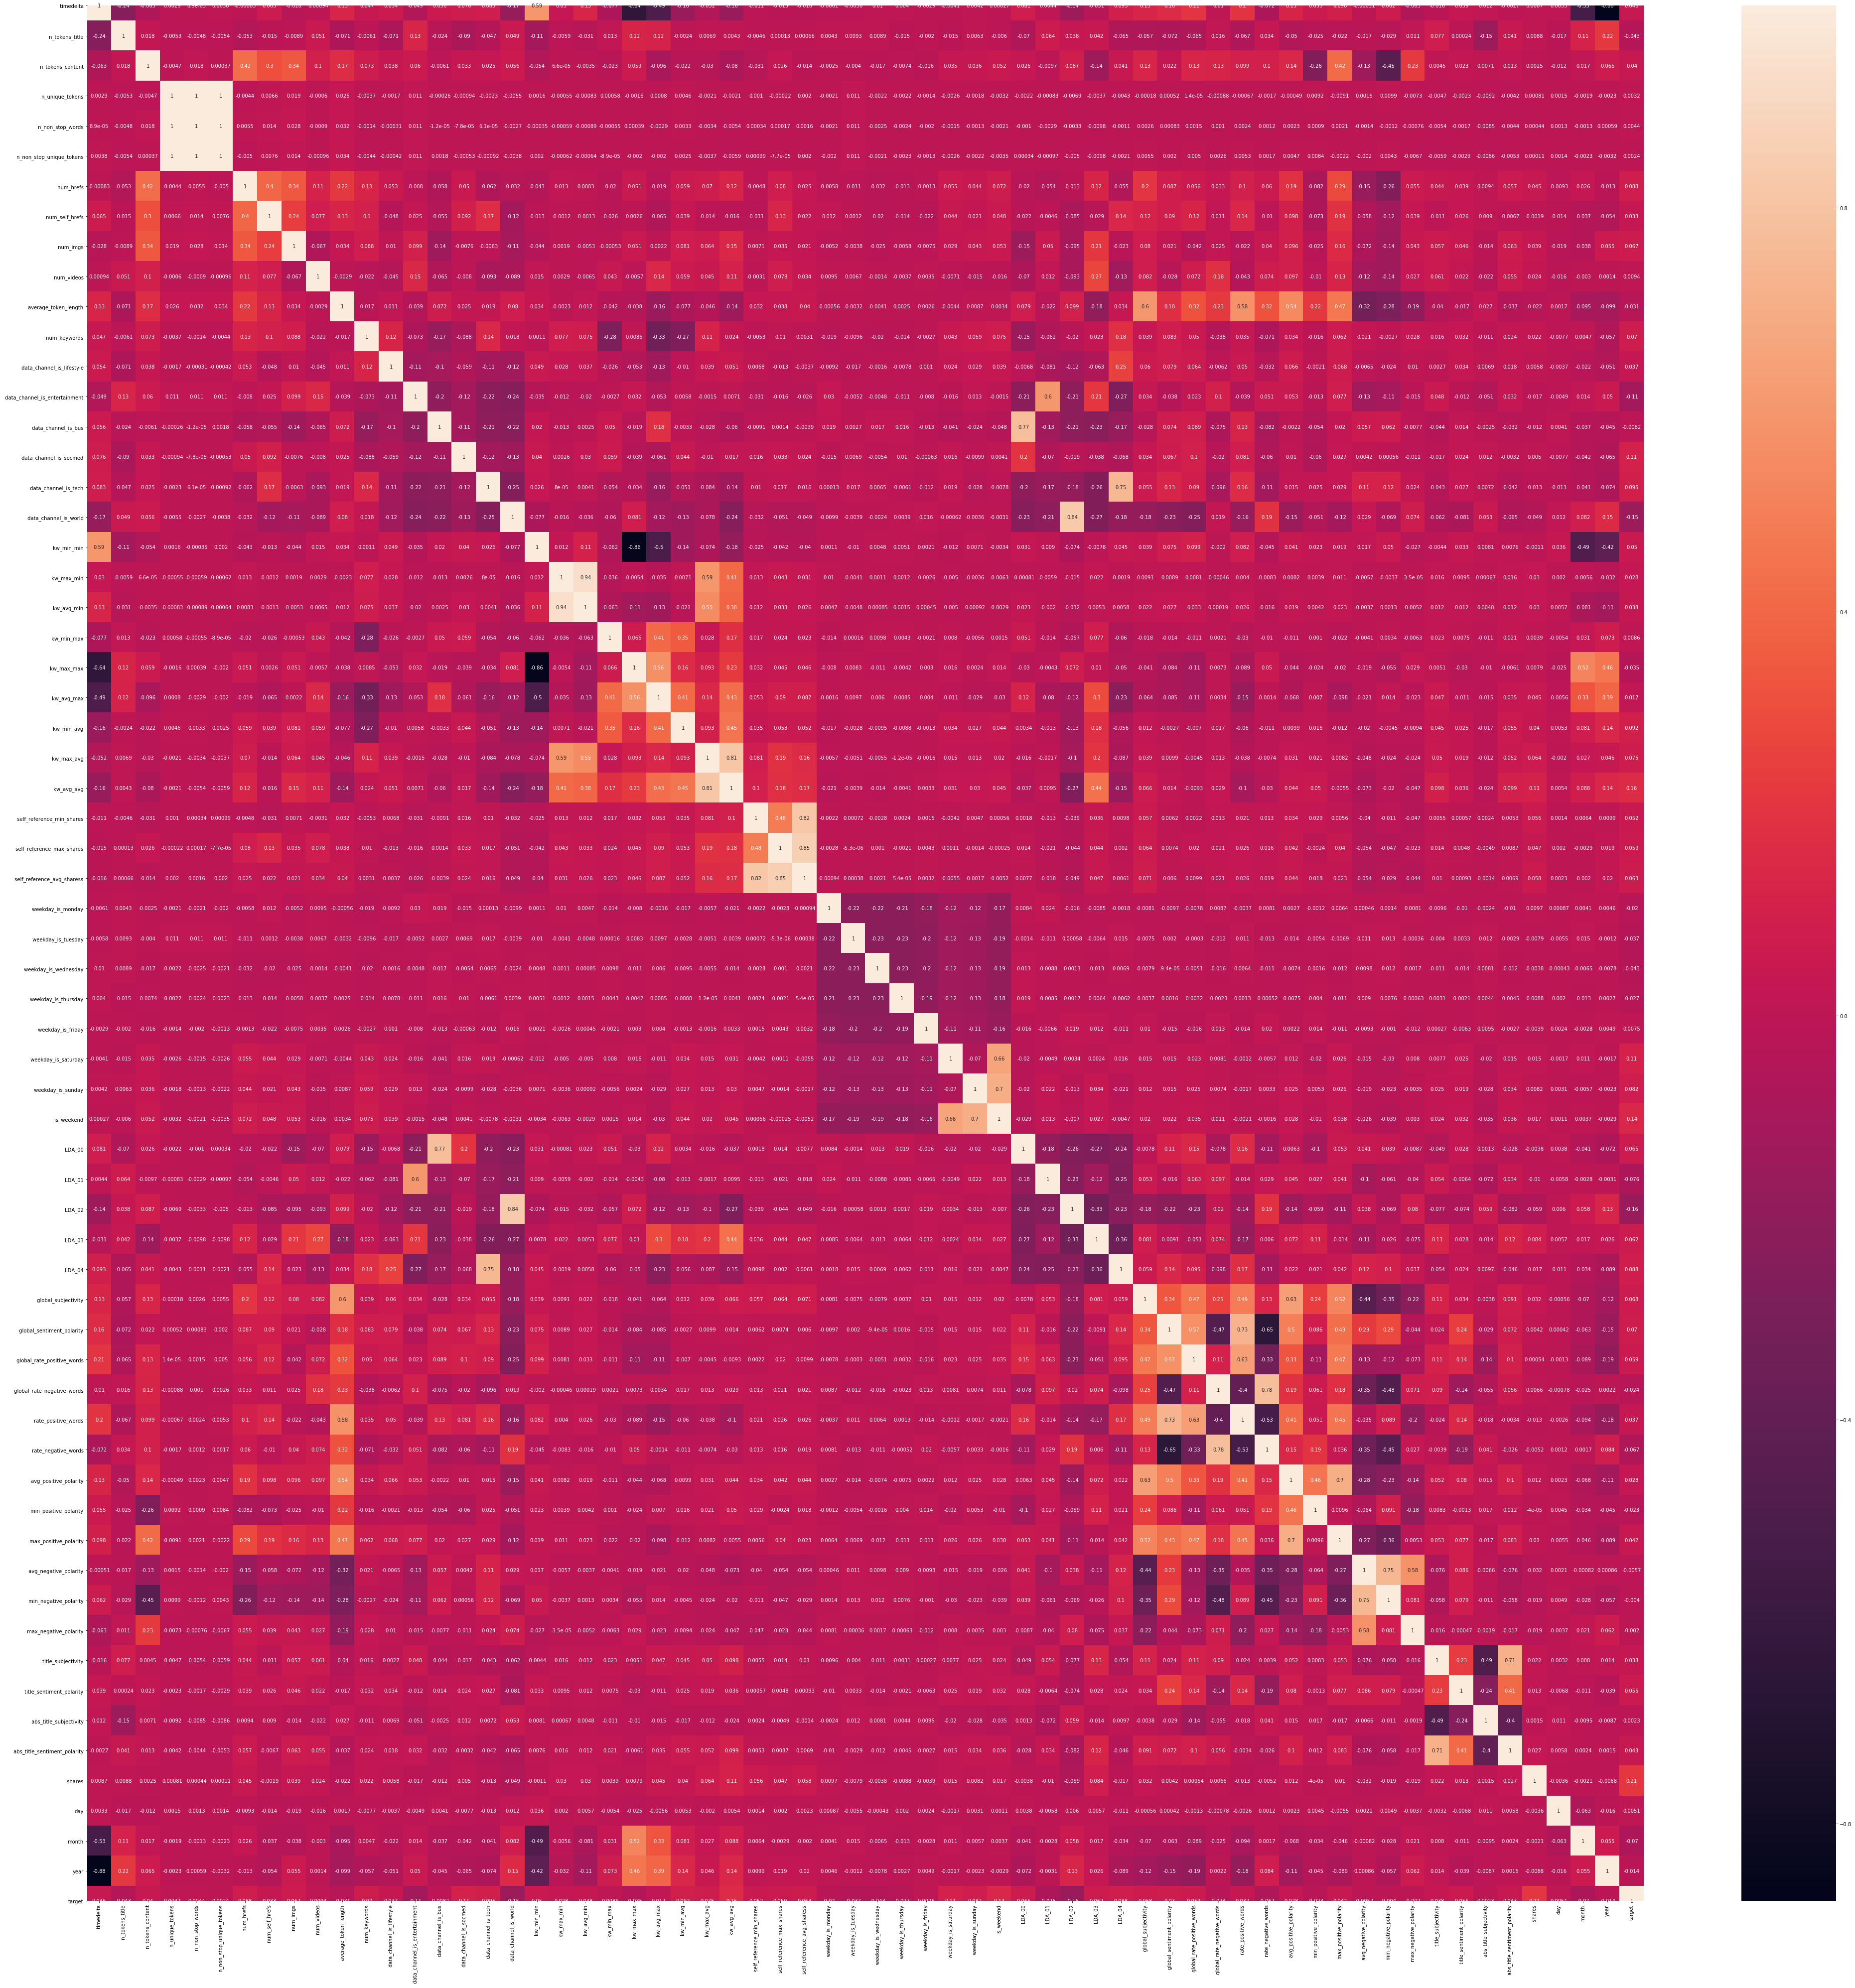

In [57]:
f, ax = plt.subplots(figsize = (70,70))
sns.heatmap(df_news.corr(), annot = True)
plt.show()

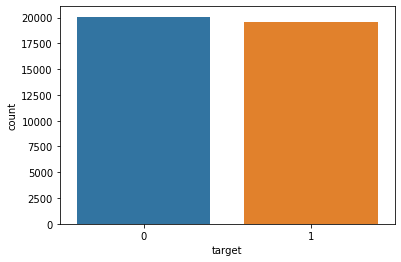

In [58]:
sns.countplot(df_news['target'])
plt.show()

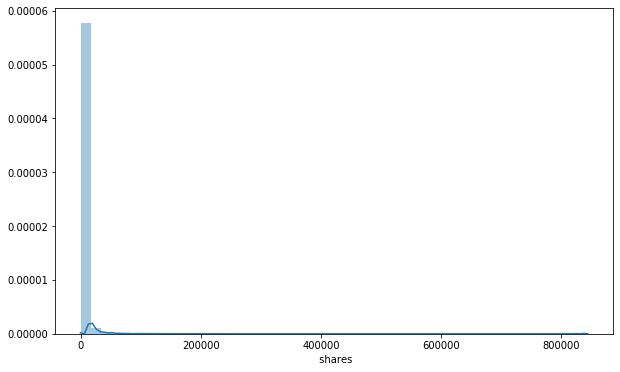

In [59]:
f, ax = plt.subplots(figsize = (10,6))
sns.distplot(df_news[' shares'])
plt.show()

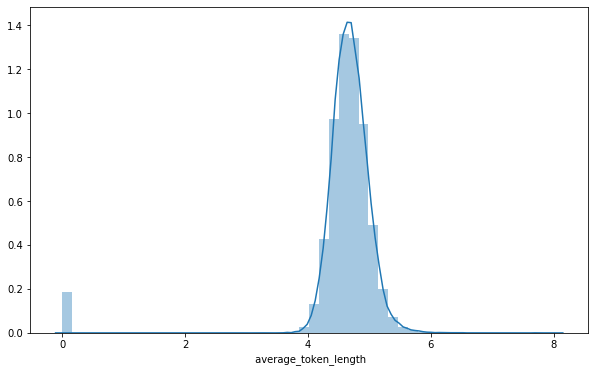

In [60]:
f, ax = plt.subplots(figsize = (10,6))
sns.distplot(df_news[' average_token_length'])
plt.show()

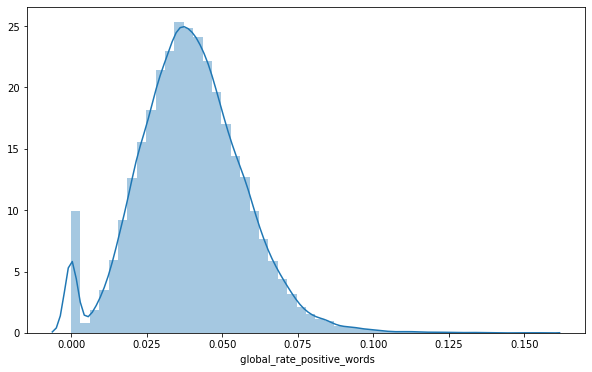

In [61]:
f, ax = plt.subplots(figsize = (10,6))
sns.distplot(df_news[' global_rate_positive_words'])
plt.show()

### 5. EDA - Inference:

1. Outliers in shares features were detected using tuckey test. It has 4541 outliers
2. _kw_max_min is highly correlated with _kw_avg_min so, rejecting _kw_max_min
3. _n_non_stop_words is highly correlated with _n_non_stop_words so, rejecting _n_non_stop_words
4. _n_unique_tokens highly corrlelated with _n_non_stop_words so, rejecting _n_unique_tokens
5. Balanced target feature

### 6.  Label Encoding / Get Dummies:

In [62]:
sc = StandardScaler()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [64]:
X_train_tarnsformed = sc.fit_transform(X_train)

In [65]:
X_test_transformed = sc.transform(X_test)

### 7.  Data handling:

In [66]:
df_news.isnull().sum()

 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                       0
 self_reference_min_shares  

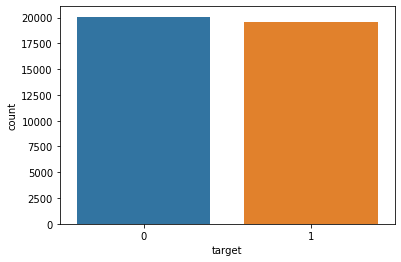

In [67]:
sns.countplot(df_news['target'])
plt.show()

In [68]:
df_news.groupby(['target'])['target'].count()

target
0    20082
1    19562
Name: target, dtype: int64

In [69]:
print('Zero\'s percentage in target column is -- ', 100*20082/df_news.shape[0] ,'%')

Zero's percentage in target column is --  50.655836948844716 %


In [70]:
print('One\'s percentage in target column is -- ', 100*19562/df_news.shape[0] ,'%')

One's percentage in target column is --  49.344163051155284 %


### Inference

1. As there are no null values there is no need for data imputation.
2. As zero's 50.65% and ones are 49.34% are there so, data is balanced so, no need for smote and sampling

### 8.  Feature selection and Feature engineering 

Feature engineering is done above. Extracted day, month and year features from the URL feature.

In [71]:
logistic_feature = LogisticRegression(n_jobs=-1)

In [72]:
rfecv = RFECV(estimator=logistic_feature, n_jobs=-1, min_features_to_select=10)

In [73]:
%%time
rfecv.fit(X_train,y_train)

CPU times: user 1min 15s, sys: 320 ms, total: 1min 16s
Wall time: 2min 22s


RFECV(cv='warn',
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='warn', n_jobs=-1, penalty='l2',
                                   random_state=None, solver='warn', tol=0.0001,
                                   verbose=0, warm_start=False),
      min_features_to_select=10, n_jobs=-1, scoring=None, step=1, verbose=0)

In [74]:
rfecv.support_

array([False,  True, False, False, False, False, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True])

In [75]:
X_train.loc[:,rfecv.support_].columns

Index([' n_tokens_title', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' shares', 'day', 'month',
       'year'],
      dtype='object')

In [76]:
X_train_new = X_train.loc[:,rfecv.support_]

In [77]:
X_test_new = X_test.loc[:,rfecv.support_]

In [78]:
logistic_model_RFECV = LogisticRegression(n_jobs=-1)

In [79]:
logistic_model_RFECV.fit(X_train_new, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
y_predict_rfecv = logistic_model_RFECV.predict(X_test_new)

In [81]:
accuracy_score(y_predict_rfecv, y_test)

1.0

In [82]:
precision_score(y_predict_rfecv, y_test)

1.0

In [83]:
recall_score(y_predict_rfecv, y_test)

1.0

### Inference

1. Used RFECV for feature selection for 10 important features such as 'n_tokens_title','num_hrefs','num_self_hrefs',' average_token_length', ' num_keywords', ' kw_min_min', ' shares','day', 'month', 'year'
2. Model is over fit

### 9.  logistic, decision tree, KNN, Na√Øve Bayes

### Logistic

In [84]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_predict_logistic_regression = logistic_regression.predict(X_test)
f1_score_logistic_regression = f1_score(y_predict_logistic_regression, y_test)
accuracy_score_logistic_regression = accuracy_score(y_predict_logistic_regression, y_test)
print('F1-score is -- ', f1_score_logistic_regression)
print('Accuracy is -- ', accuracy_score_logistic_regression)

F1-score is --  0.8538518245484704
Accuracy is --  0.8666554565327056


### Decision Tree

In [85]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_predict_decision_tree = decision_tree.predict(X_test)
f1_score_decision_tree = f1_score(y_predict_decision_tree, y_test)
accuracy_score_decision_tree = accuracy_score(y_predict_decision_tree, y_test)
print('F1-score is -- ', f1_score_decision_tree)
print('Accuracy is -- ', accuracy_score_decision_tree)

F1-score is --  1.0
Accuracy is --  1.0


### KNN

In [86]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_predict_knn = knn.predict(X_test)
f1_score_logistic_knn = f1_score(y_predict_knn, y_test)
accuracy_score_knn = accuracy_score(y_predict_knn, y_test)
print('F1-score is -- ', f1_score_logistic_knn)
print('Accuracy is -- ', accuracy_score_knn)

F1-score is --  0.6983633537533144
Accuracy is --  0.7226332604674626


### Navie Bayes

In [87]:
navie_bayes = GaussianNB()
navie_bayes.fit(X_train, y_train)
y_predict_navie_bayes = navie_bayes.predict(X_test)
f1_score_navie_bayes = f1_score(y_predict_navie_bayes, y_test)
accuracy_score_navie_bayes = accuracy_score(y_predict_navie_bayes, y_test)
print('F1-score is -- ', f1_score_navie_bayes)
print('Accuracy is -- ', accuracy_score_navie_bayes)

F1-score is --  0.8637924456314384
Accuracy is --  0.87993946527661


### Inference

1. Decison tree over fitting in this case.
2. Logistic Regression was good fit
3. GauusianNB was also good fit but will go with Logistic regression as its simple model
4. KNN is underfit model in this xase

### 10.  Ensemble techniques:

### Random Forest

In [88]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)
f1_score_rf = f1_score(y_predict_rf, y_test)
accuracy_score_rf = accuracy_score(y_predict_rf, y_test)
print('F1-score is -- ', f1_score_rf)
print('Accuracy is -- ', accuracy_score_rf)

F1-score is --  1.0
Accuracy is --  1.0


### XGBOOST

In [89]:
xg = XGBClassifier(n_jobs=-1)
xg.fit(X_train, y_train)
y_predict_xg = xg.predict(X_test)
f1_score_xg = f1_score(y_predict_xg, y_test)
accuracy_score_xg = accuracy_score(y_predict_xg, y_test)
print('F1-score is -- ', f1_score_xg)
print('Accuracy is -- ', accuracy_score_xg)

F1-score is --  1.0
Accuracy is --  1.0


### Inference

Random forest and XGboost both are over fitting in this case

### 11. Output

In [90]:
pd.DataFrame({'Model Name':['Logistic Regression', 'Decision Tree', 'KNN', 'Navie Bayes', 'Random Forest', 'XGBoost'],\
              'F1-score':[f1_score_logistic_regression, f1_score_decision_tree, f1_score_logistic_knn, \
                          f1_score_navie_bayes, f1_score_rf, f1_score_xg],\
              'Accuracy score':[accuracy_score_logistic_regression, accuracy_score_decision_tree,\
                               accuracy_score_knn, accuracy_score_navie_bayes, accuracy_score_rf,accuracy_score_xg]})

Model Name  F1-score  Accuracy score
0  Logistic Regression  0.853852        0.866655
1        Decision Tree  1.000000        1.000000
2                  KNN  0.698363        0.722633
3          Navie Bayes  0.863792        0.879939
4        Random Forest  1.000000        1.000000
5              XGBoost  1.000000        1.000000

### Inference

Logistic Regression is the best model as it has good fit and is not overfitting for the dataset and its easy to explain the methodlogy and the process to the concerned stakeholders and management.